In [ ]:
import pickle
import time
import numpy as np
from matplotlib import pyplot as plt

In [2]:
IDs = pickle.load(open('/home/maspe/filer/scripts/preprocessing/IDs.dict', 'rb'))['list_all']
WTs = pickle.load(open('/home/maspe/filer/scripts/preprocessing/IDs.dict', 'rb'))['list_WT']

Done!
[-5.  0.  5. 10. 15. 20. 25. 30. 35.]


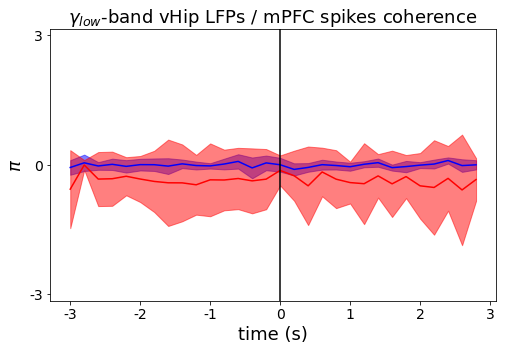

In [48]:
phase_means = {}

band = 'low_gamma'
clock = time.time()
spikes_LFPs = dict()
for mouse in IDs:
    #print('Loading mouse {}...'.format(mouse))
    
    npys_dir = '/home/maspe/filer/SERT/' + mouse + '/npys/' 
    spikes_LFPs[mouse] = pickle.load(open(npys_dir + mouse + '.spikes_LFPs', 'rb'))
    
    phase_means[mouse] = \
    np.asarray([spikes_LFPs[mouse][band][unit][0] for unit in range(len(spikes_LFPs[mouse][band]))])
    #sd   = np.asarray([spikes_LFPs['theta'][unit][1] for unit in range(len(spikes_LFPs['theta']))])
    
    #average_phase = 
    
    
print('Done!')


n_mice = len(phase_means.keys())
all_means_WT = []
all_means_KO = []

iterator = 0
for key in phase_means.keys():
    if key in WTs:
        all_means_WT.append(phase_means[key])
    else:
        all_means_KO.append(phase_means[key])
    

all_means_WT = np.array(all_means_WT)
all_means_KO = np.array(all_means_KO)


mean_WT = np.mean(all_means_WT, axis=0)
sem_WT = np.std(all_means_WT, axis=0)

mean_KO = np.mean(all_means_KO, axis=0)
sem_KO = np.std(all_means_KO, axis=0)

plt.figure(1, figsize=(8, 5))


plt.plot(mean_WT, color='blue')
plt.fill_between(np.arange(30), mean_WT-sem_WT, mean_WT+sem_WT, color='blue', alpha=0.5)

plt.plot(mean_KO, color='red')
plt.fill_between(np.arange(30), mean_KO-sem_KO, mean_KO+sem_KO, color='red', alpha=0.5)

plt.axvline(x=15, color='black')

plt.ylim([-3.15, 3.15])

locs, labels = plt.xticks()   
print(locs)
plt.xticks([0, 5, 10, 15, 20, 25, 30], ['-3', '-2', '-1', '0', '1', '2','3'], fontsize=14) 
plt.yticks([-3, 0, 3], ['-3', '0', '3'], fontsize=14)

plt.xlabel('time (s)', fontsize=18)
plt.ylabel('$\pi$', fontsize=18)


plt.title(r'$\gamma_{low}$-band vHip LFPs / mPFC spikes coherence', fontsize=18)


plt.savefig('/home/maspe/filer/SERT/ALL/figs/spikes_LFPs_gamma_low.png',
            dpi=150, orientation='landscape')

<Figure size 432x288 with 0 Axes>